## CIENCCIA DE DATOS EN PYTHON
### PROYECTO FINAL

### Estimacion de Modelo

Crear modelos predictivos de regresion lineal uni-variable sencillos

###### Variables

-- SalePrice = el precio de venta de la propiedad en dolares. Variable objetivo que se necesita predecir.

-- OverallQual =  Calidada de materiales y acabados. Califica el material general y el acabado de la casa.

-- FlrSF1st = pies cuadrados del primer piso.

-- TotRmsAbvGrd = total habitaciones (no incluye banos).

-- YearBuilt = anio de construccion

-- LotFrontage: pies lineales de calle, conectada a la propiedad.

#### Paso No.1

In [143]:
###### Librerias

In [249]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [250]:
# Carga de data

In [301]:
import numpy as np
data_proy = np.load('proyecto_training_data.npy')

In [302]:
dimension = data_proy.shape
dimension

(1460, 6)

In [303]:
rango = data_proy.ndim
rango

2

In [304]:
type(data_proy)

numpy.ndarray

In [305]:
# Revision de la Data

In [306]:
# Nombrar las Variables
data = pd.DataFrame(data=data_proy, columns=['SalePrice', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [307]:
# Reordenar variables, anio primera variable
data = data[['SalePrice', 'YearBuilt', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'LotFrontage']]

In [308]:
# Revisiones valores NaN
data.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage      True
dtype: bool

In [309]:
# Eliminar Valores NaN
data = data.fillna(method='ffill')
data

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...,...
1455,175000.0,1999.0,6.0,953.0,7.0,62.0
1456,210000.0,1978.0,6.0,2073.0,7.0,85.0
1457,266500.0,1941.0,7.0,1188.0,9.0,66.0
1458,142125.0,1950.0,5.0,1078.0,5.0,68.0


In [310]:
data.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage     False
dtype: bool

In [311]:
#Revision de la data
data.head()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0


#### Paso No.2

#### Separacion de la data

In [12]:
#Entrenamiento-Validacion y Prueba

In [312]:
x = data['SalePrice']
y = data.iloc[:, 1:6]

In [313]:
x

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [314]:
y

,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,2003.0,7.0,856.0,8.0,65.0
1,1976.0,6.0,1262.0,6.0,80.0
2,2001.0,7.0,920.0,6.0,68.0
3,1915.0,7.0,961.0,7.0,60.0
4,2000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...
1455,1999.0,6.0,953.0,7.0,62.0
1456,1978.0,6.0,2073.0,7.0,85.0
1457,1941.0,7.0,1188.0,9.0,66.0
1458,1950.0,5.0,1078.0,5.0,68.0


In [315]:
train_x = x[:80]
train_y = y[:80]

In [316]:
test_x = x[80:]
test_y = y[80:]

#### Paso No.3

#### Analisis Exploratorio de los datos

In [317]:
#Informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   YearBuilt     1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   FlrSF1st      1460 non-null   float64
 4   TotRmsAbvGrd  1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [318]:
# Informacion estadistica de la data
data.describe()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1971.267808,6.099315,1162.626712,6.517808,70.104795
std,79442.502883,30.202904,1.382997,386.587738,1.625393,23.846996
min,34900.000000,1872.000000,1.000000,334.000000,2.000000,21.000000
25%,129975.000000,1954.000000,5.000000,882.000000,5.000000,59.000000
50%,163000.000000,1973.000000,6.000000,1087.000000,6.000000,70.000000
75%,214000.000000,2000.000000,7.000000,1391.250000,7.000000,80.000000
max,755000.000000,2010.000000,10.000000,4692.000000,14.000000,313.000000


##### Variable 1 = SalePrice

In [319]:
SalePrice = data["SalePrice"]
media = data["SalePrice"].mean()
valor_maximo = data["SalePrice"].max()
valor_minimo = data["SalePrice"].min()
rango = data["SalePrice"].max() - data["SalePrice"].min()
std = data["SalePrice"].std(ddof=0)

In [320]:
data.describe()['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Variable 2 = YearBuilt

In [321]:
YearBuilt = data["YearBuilt"]
media = data["YearBuilt"].mean()
valor_maximo = data["YearBuilt"].max()
valor_minimo = data["YearBuilt"].min()
rango = data["YearBuilt"].max() - data["YearBuilt"].min()
std = data["YearBuilt"].std(ddof=0)

In [322]:
data.describe()['YearBuilt']

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

##### Variable 3 = OverallQual

In [323]:
OverallQual = data["OverallQual"]
media = data["OverallQual"].mean()
valor_maximo = data["OverallQual"].max()
valor_minimo = data["OverallQual"].min()
rango = data["OverallQual"].max() - data["OverallQual"].min()
std = data["OverallQual"].std(ddof=0)

In [324]:
data.describe()['OverallQual']

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

##### Variable 4 = FlrSF1st

In [327]:
FlrSF1st = data["FlrSF1st"]
media = data["FlrSF1st"].mean()
valor_maximo = data["FlrSF1st"].max()
valor_minimo = data["FlrSF1st"].min()
rango = data["FlrSF1st"].max() - data["FlrSF1st"].min()
std = data["FlrSF1st"].std(ddof=0)

In [328]:
data.describe()['FlrSF1st']

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: FlrSF1st, dtype: float64

##### Variable 5 = TotRmsAbvGrd

In [333]:
V5 = data["TotRmsAbvGrd"]
media = data["TotRmsAbvGrd"].mean()
valor_maximo = data["TotRmsAbvGrd"].max()
valor_minimo = data["TotRmsAbvGrd"].min()
rango = data["TotRmsAbvGrd"].max() - data["TotRmsAbvGrd"].min()
std = data["TotRmsAbvGrd"].std(ddof=0)

In [334]:
data.describe()['TotRmsAbvGrd']

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

##### Variable 6 = LotFrontage

In [331]:
V5 = data["LotFrontage"]
media = data["LotFrontage"].mean()
valor_maximo = data["LotFrontage"].max()
valor_minimo = data["LotFrontage"].min()
rango = data["LotFrontage"].max() - data["LotFrontage"].min()
std = data["LotFrontage"].std(ddof=0)

In [332]:
data.describe()['LotFrontage']

count    1460.000000
mean       70.104795
std        23.846996
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Paso No.4

#### Generacion de Histogramas

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   YearBuilt     1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   FlrSF1st      1460 non-null   float64
 4   TotRmsAbvGrd  1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

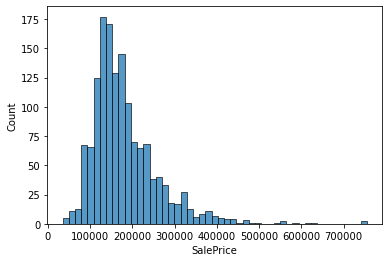

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["SalePrice"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

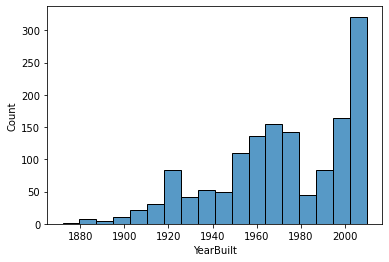

In [336]:
sns.histplot(data["YearBuilt"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

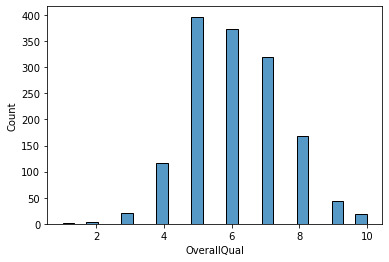

In [337]:
sns.histplot(data["OverallQual"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

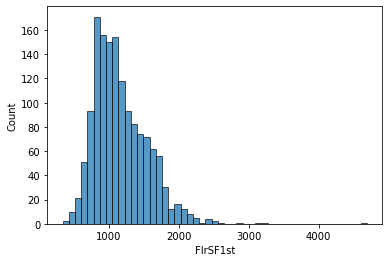

In [339]:
sns.histplot(data["FlrSF1st"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

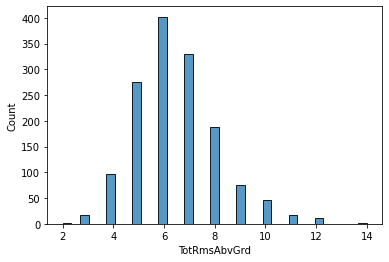

In [340]:
sns.histplot(data["TotRmsAbvGrd"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

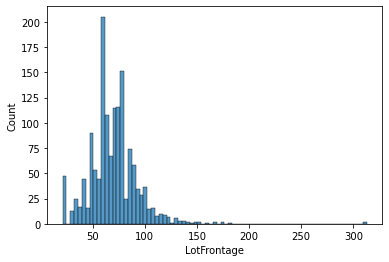

In [341]:
sns.histplot(data["LotFrontage"])
plt.show

#### Paso No.5

Variable Independiente x

In [342]:
data.corr(method="pearson")

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
SalePrice,1.000000,0.522897,0.790982,0.605852,0.533723,0.298490
YearBuilt,0.522897,1.000000,0.572323,0.281986,0.095589,0.107828
OverallQual,0.790982,0.572323,1.000000,0.476224,0.427452,0.215195
FlrSF1st,0.605852,0.281986,0.476224,1.000000,0.409516,0.373312
TotRmsAbvGrd,0.533723,0.095589,0.427452,0.409516,1.000000,0.294840
LotFrontage,0.298490,0.107828,0.215195,0.373312,0.294840,1.000000


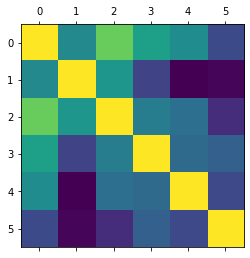

In [345]:
plt.matshow(data.corr())